### Import Relevant libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [4]:
patient_97 = pd.read_csv('Patient 97_data.csv')

In [5]:
patient_97.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,...,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000,14750.000000
mean,0.066609,0.446732,0.935289,1.552104,1.668824,3.226460,1.063450,1.018171,1.013444,1.054566,...,1.872896,1.734486,2.005091,1.901014,1.049212,1.911586,2.063854,1.970665,2.010365,42.366078
std,0.011434,0.016395,0.017433,0.021794,0.072534,1.974690,0.052951,0.002563,0.004170,0.025012,...,0.024919,0.031425,0.025819,0.113114,0.062417,0.018734,0.006738,0.004821,0.015580,13.722069
min,0.012893,0.333043,0.877690,1.489208,1.552945,1.193478,1.034103,0.980674,0.938869,0.977346,...,1.814298,1.665692,1.893095,1.423887,0.729543,1.696832,1.917381,1.955822,1.942659,26.700000
25%,0.063497,0.444758,0.926220,1.539112,1.617041,2.418031,1.042932,1.016975,1.013554,1.044953,...,1.858723,1.717464,2.001174,1.891909,1.034270,1.907657,2.063849,1.967480,1.999442,36.000000
50%,0.068768,0.449176,0.929337,1.542686,1.636502,2.636817,1.046470,1.017803,1.015174,1.067136,...,1.869906,1.729692,2.011408,1.936789,1.062825,1.914328,2.064353,1.970439,2.014151,38.800000
75%,0.073579,0.453535,0.933849,1.552588,1.703628,2.970884,1.052495,1.018761,1.015846,1.071333,...,1.881476,1.743849,2.019537,1.964217,1.088093,1.919943,2.064889,1.973639,2.022719,42.100000
max,0.091700,0.470932,1.054426,1.647537,1.873250,31.183121,1.586521,1.069966,1.018827,1.090633,...,2.012765,1.948914,2.043645,2.023596,1.150078,1.943754,2.070495,2.031794,2.040294,97.600000


In [6]:
X=patient_97.drop('BIS', axis=1)
y= patient_97['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [7]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

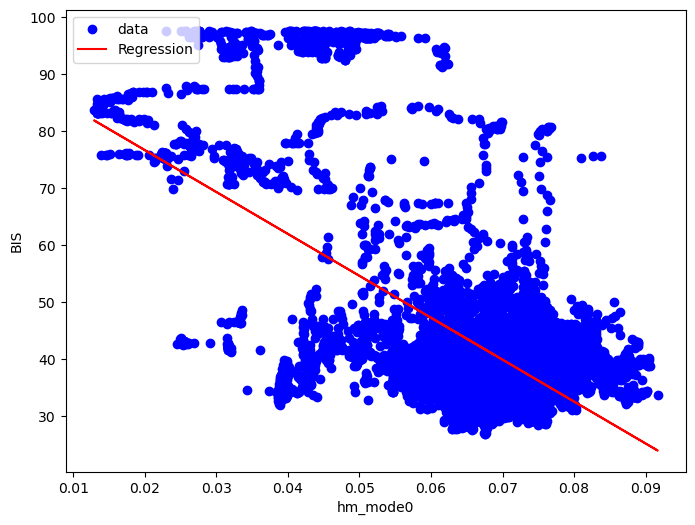

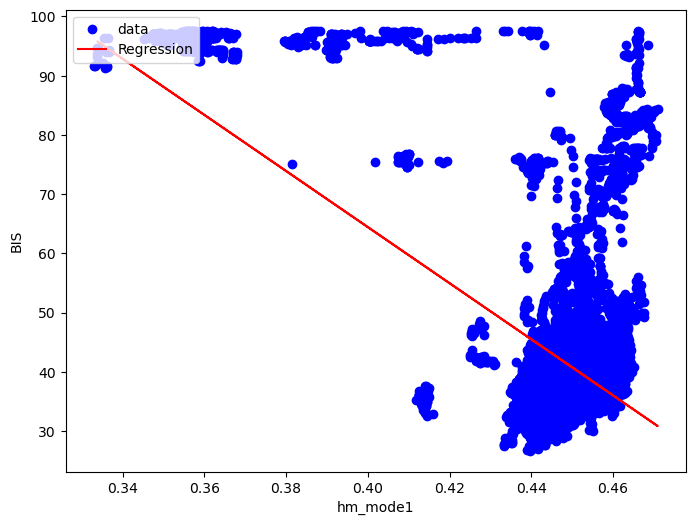

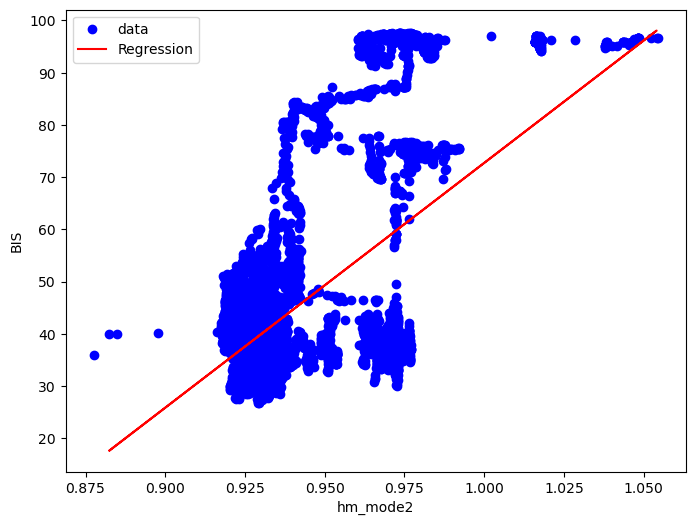

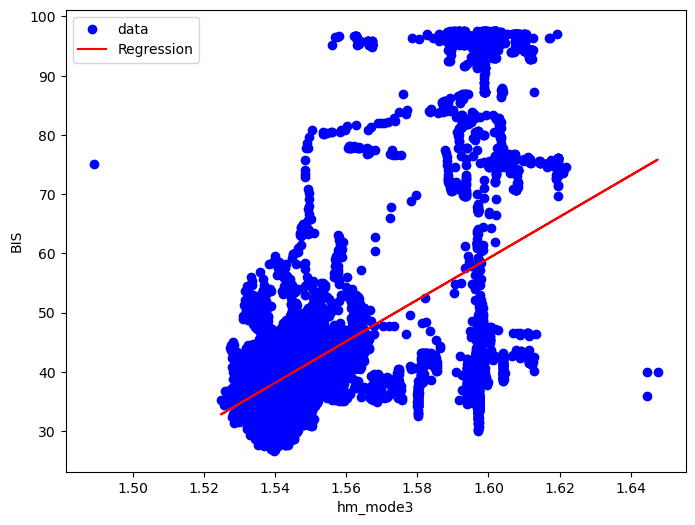

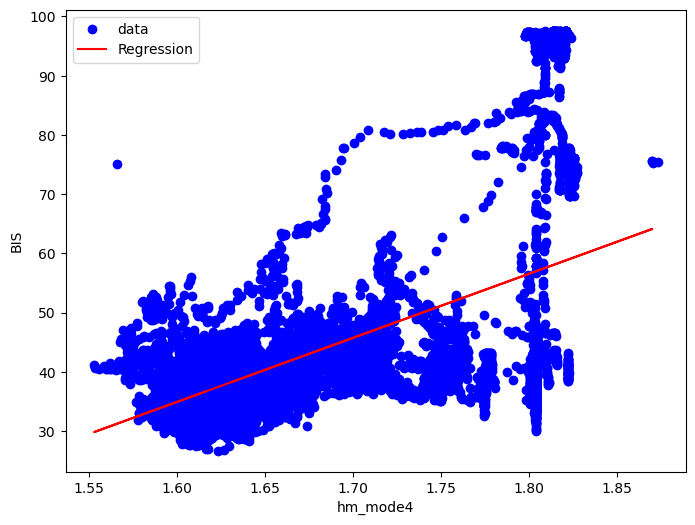

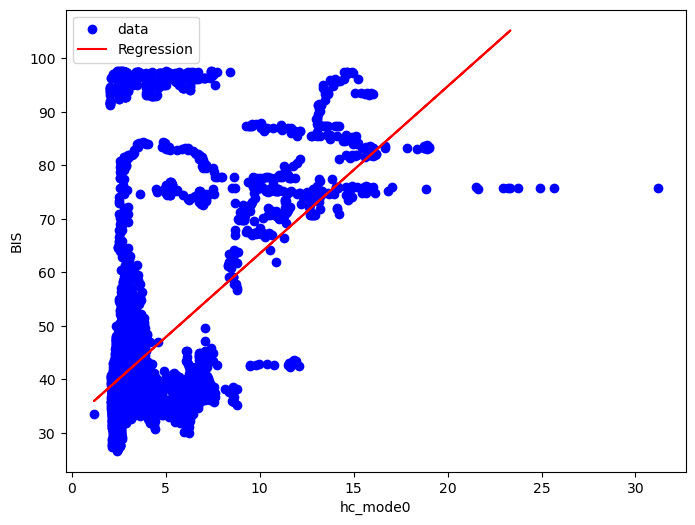

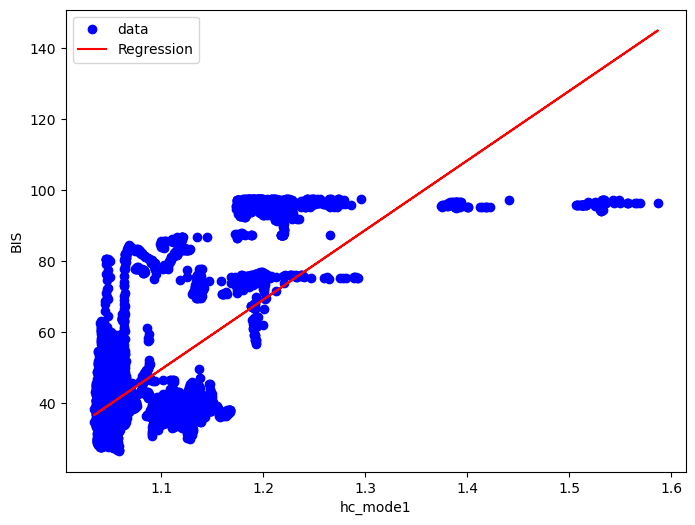

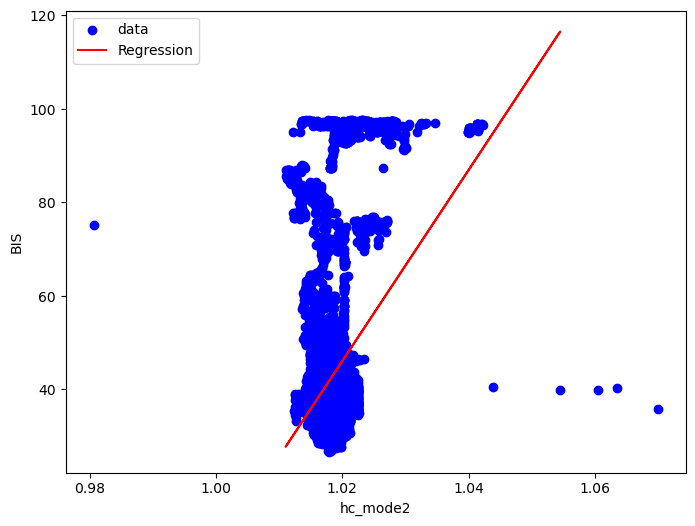

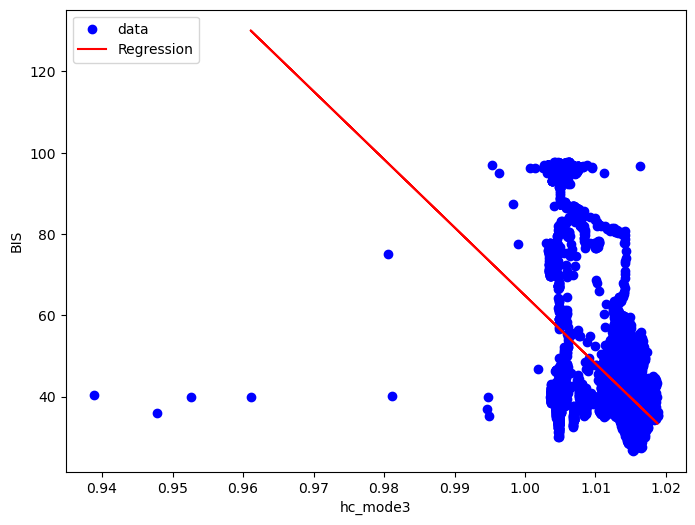

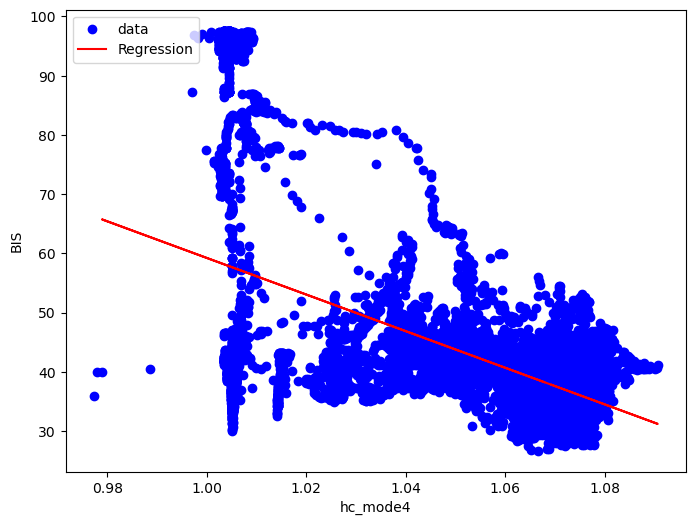

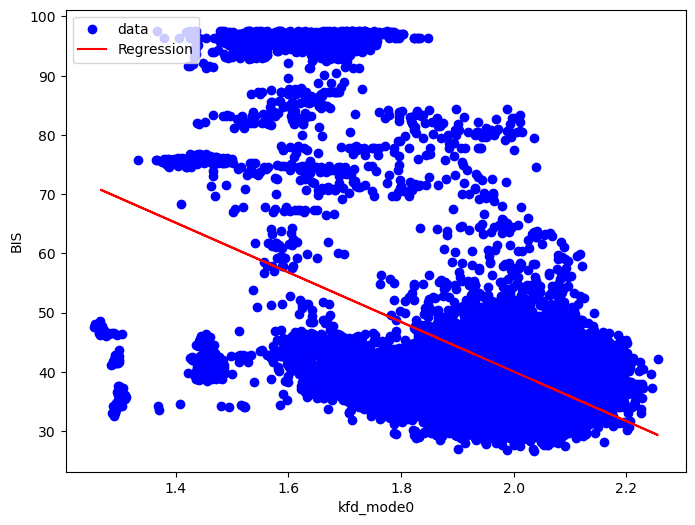

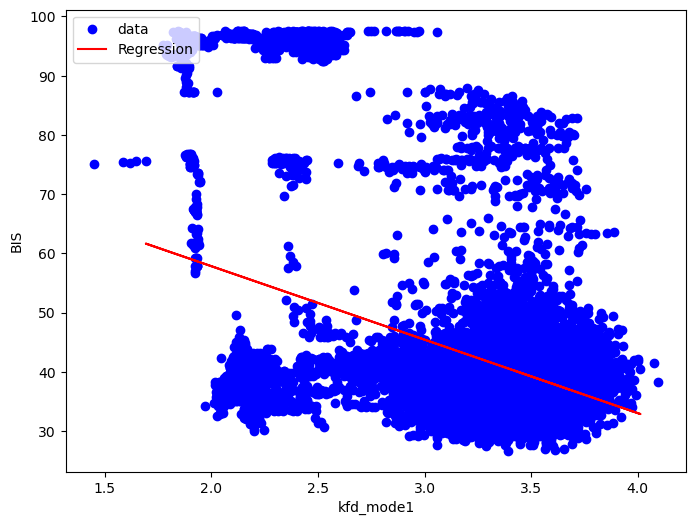

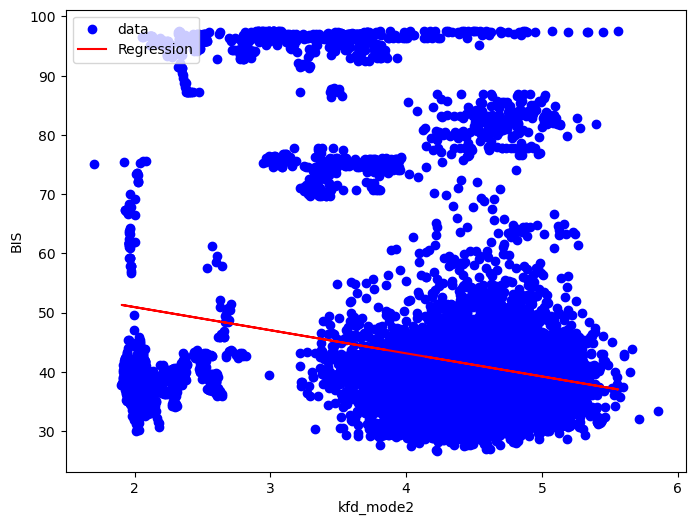

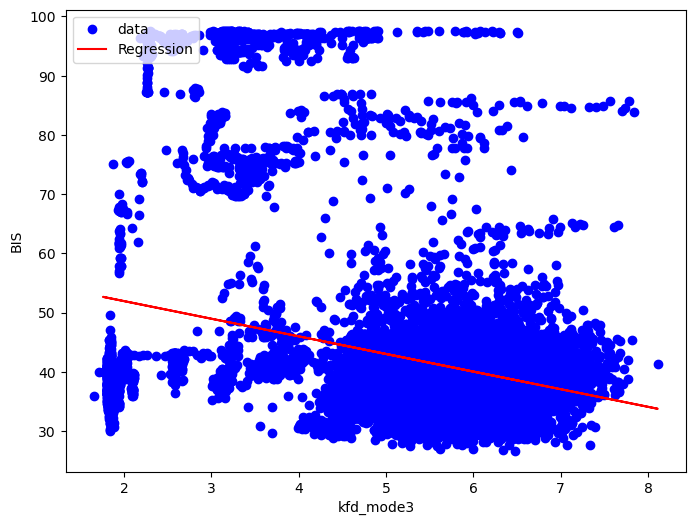

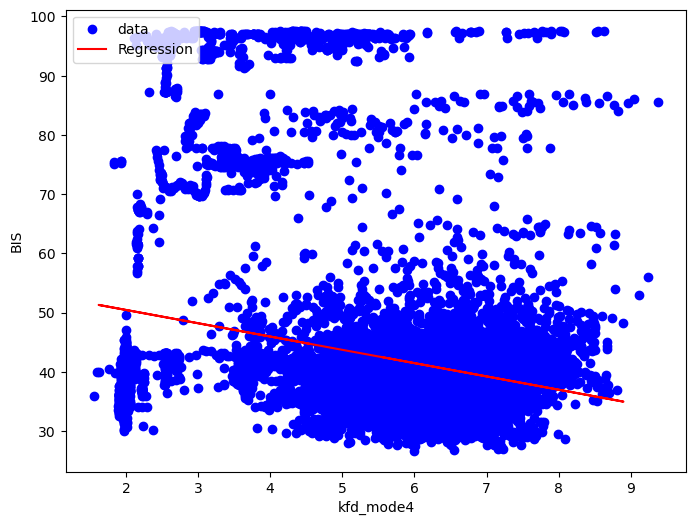

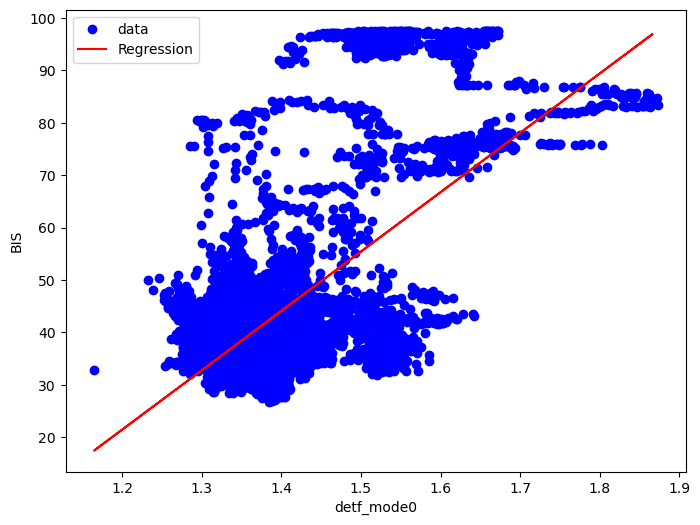

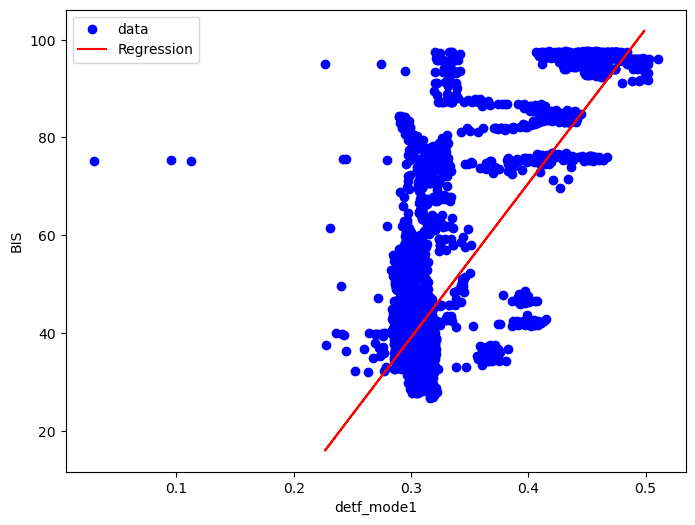

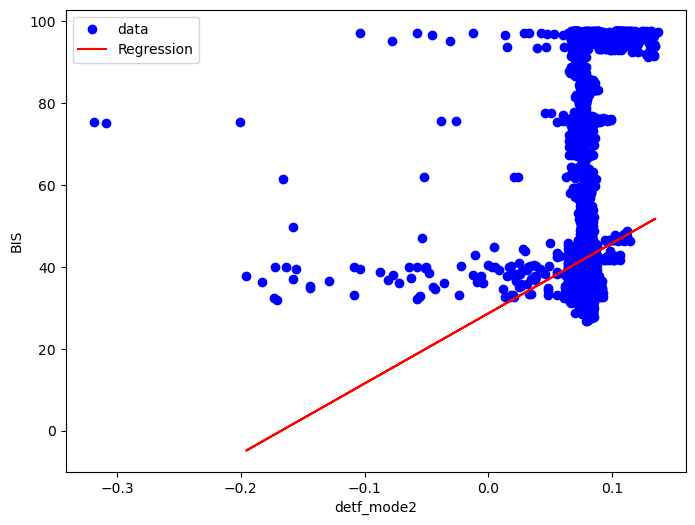

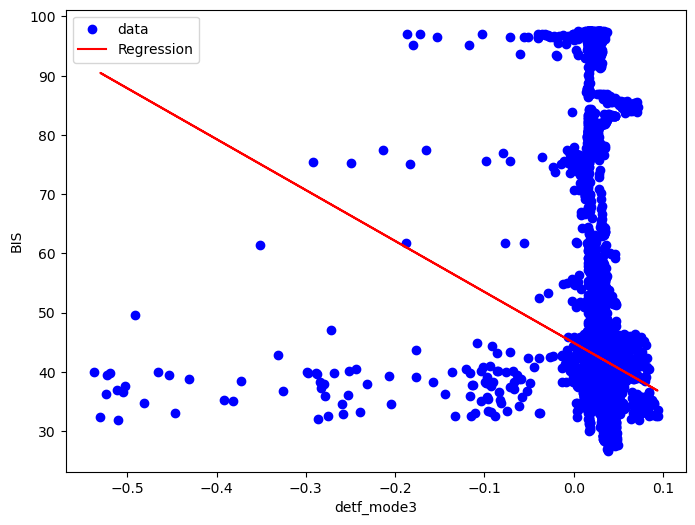

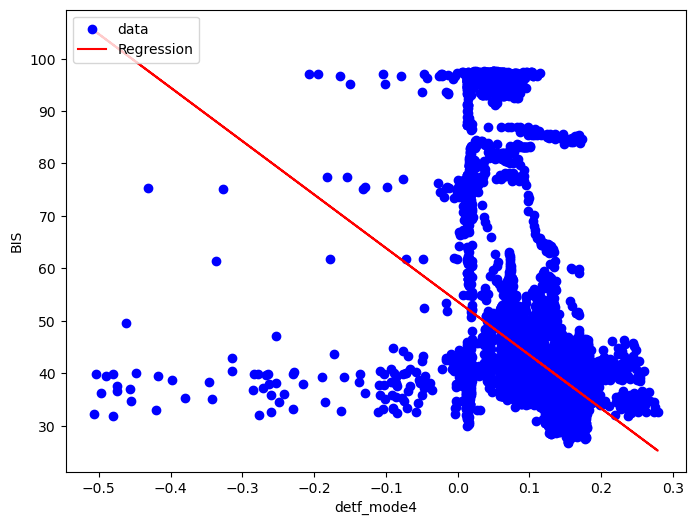

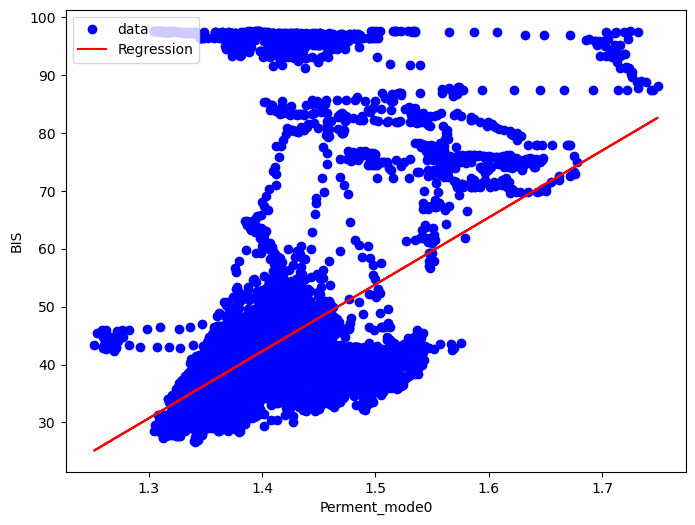

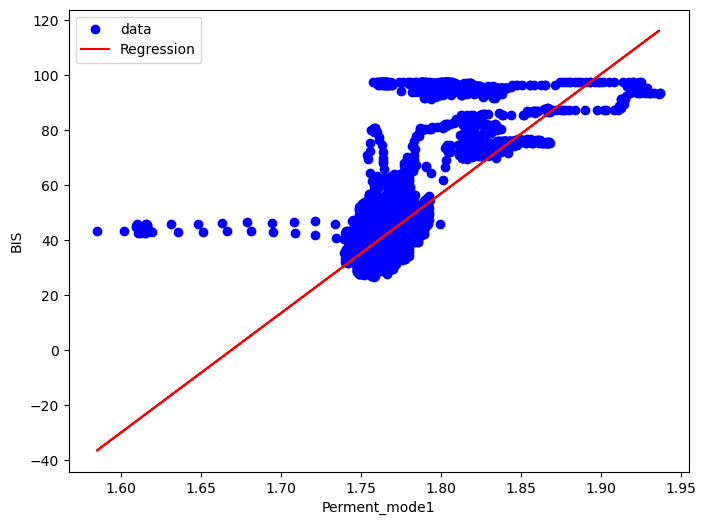

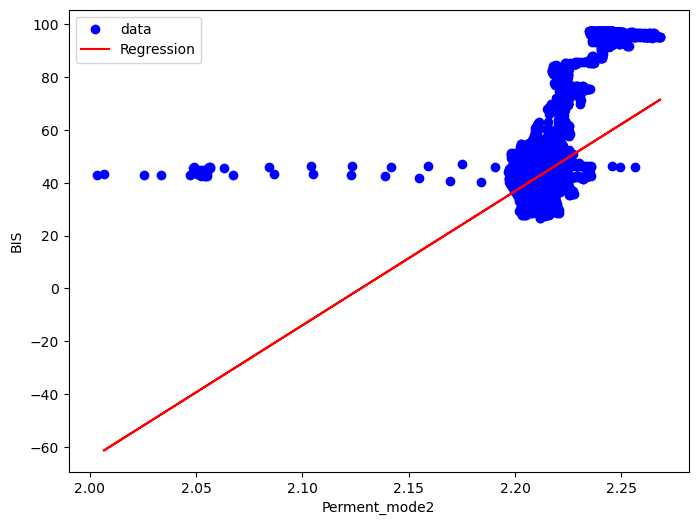

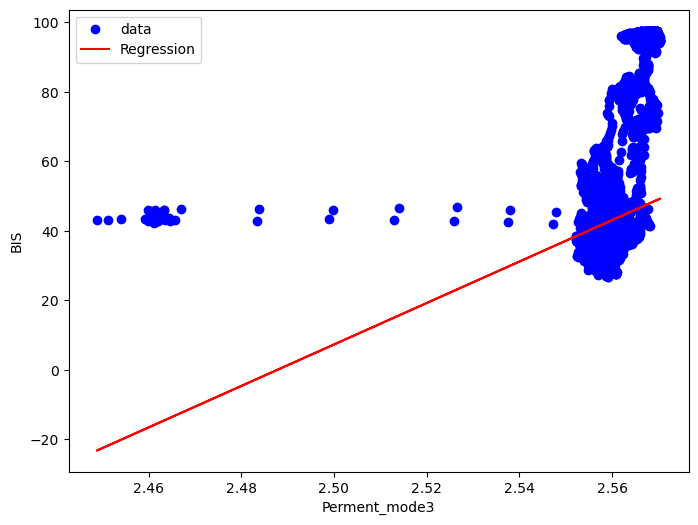

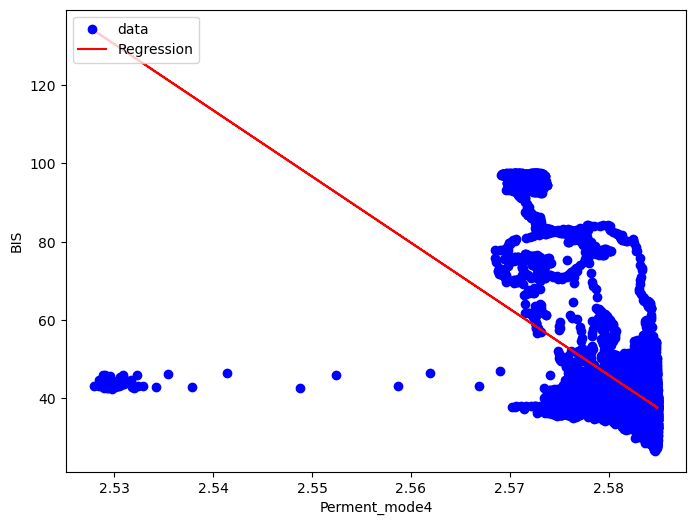

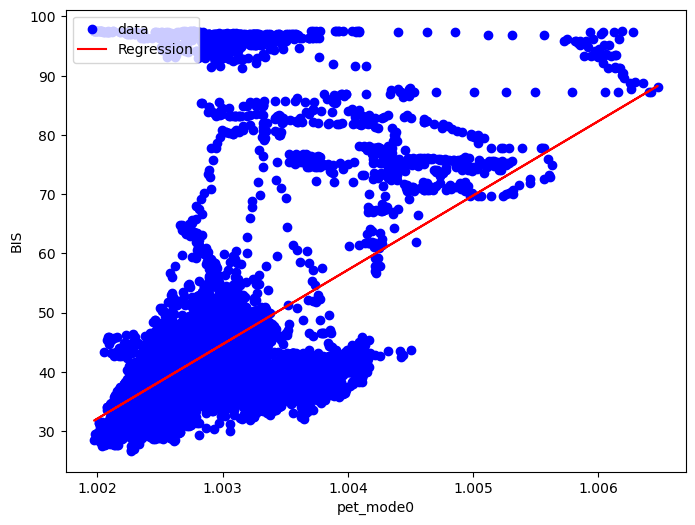

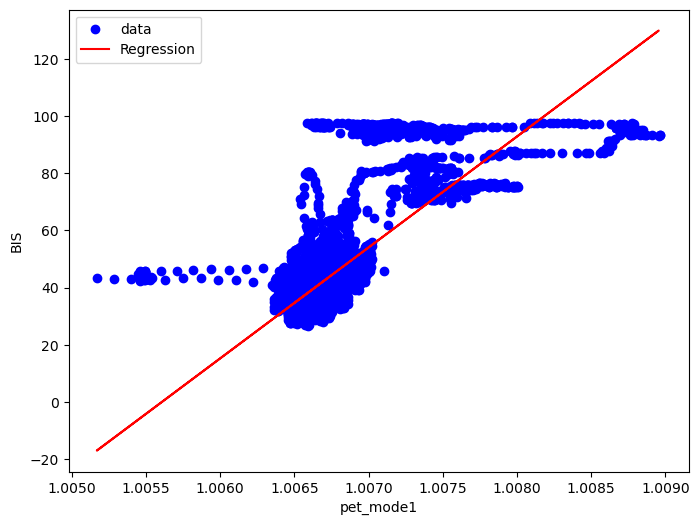

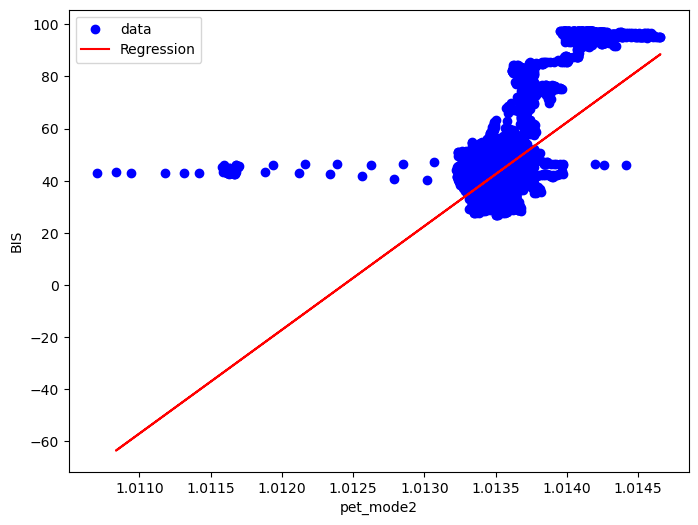

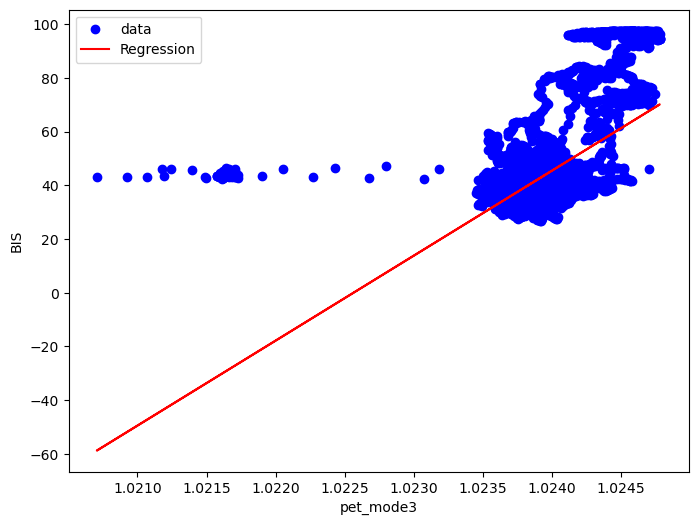

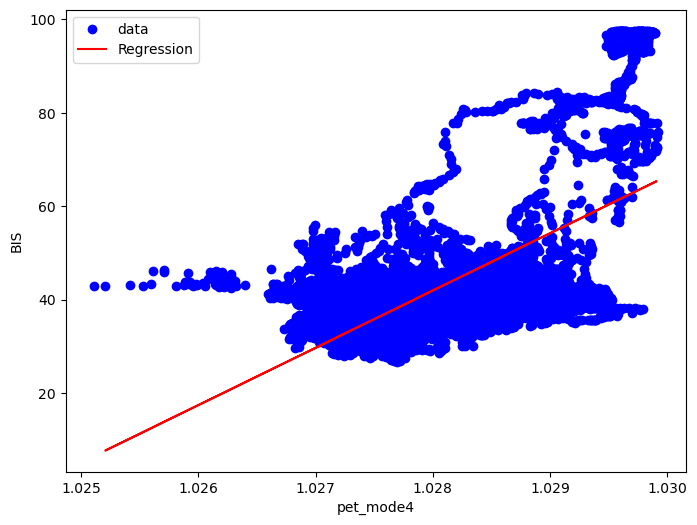

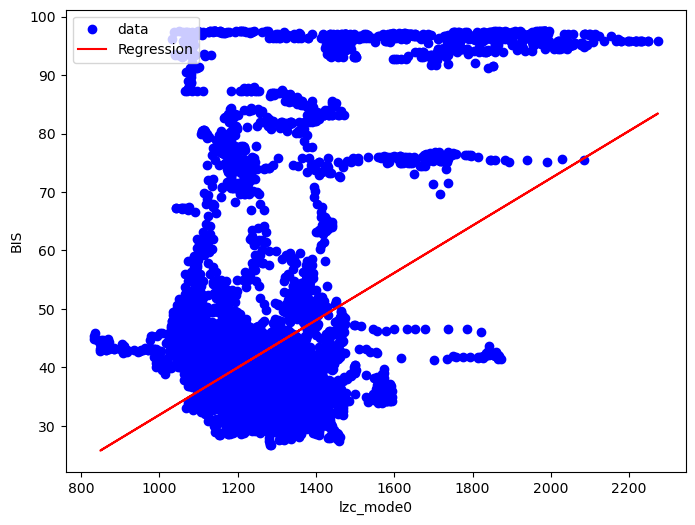

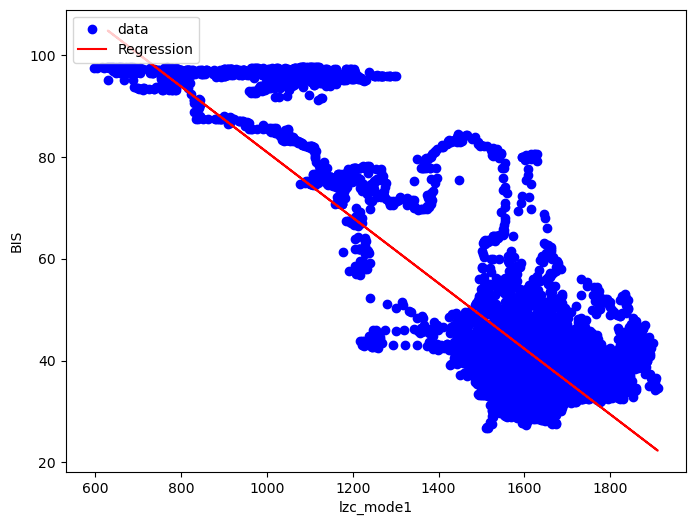

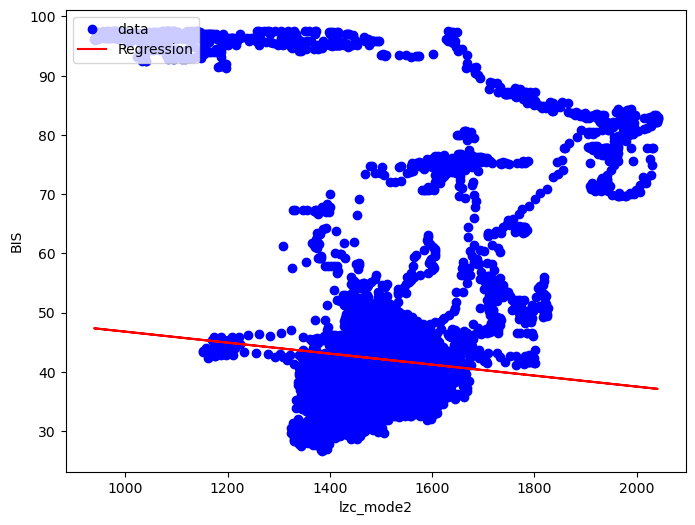

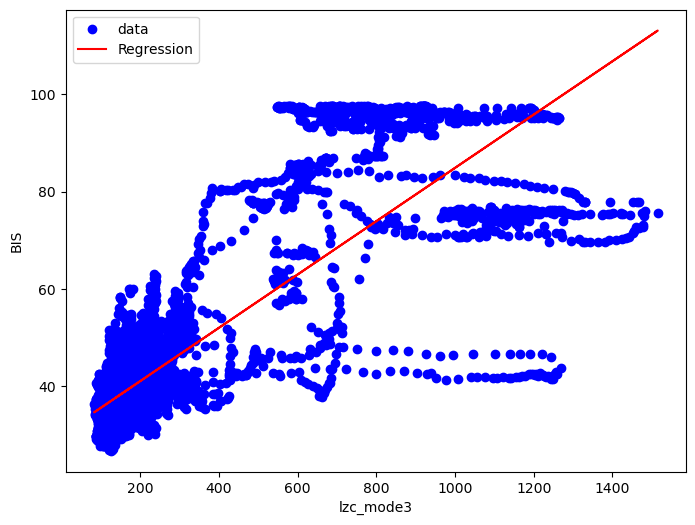

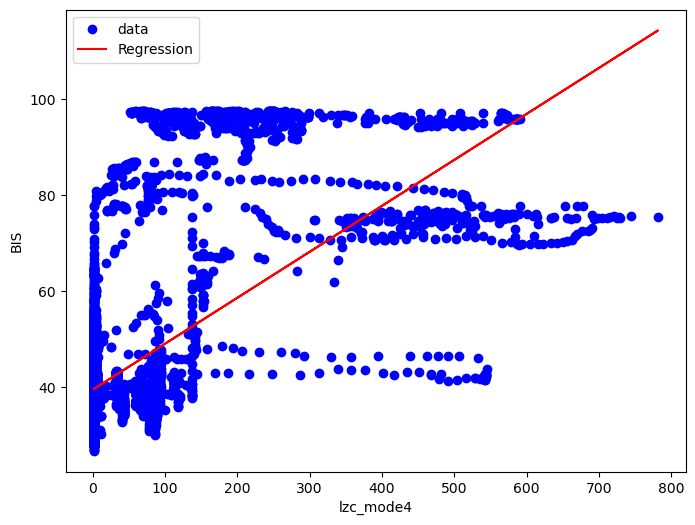

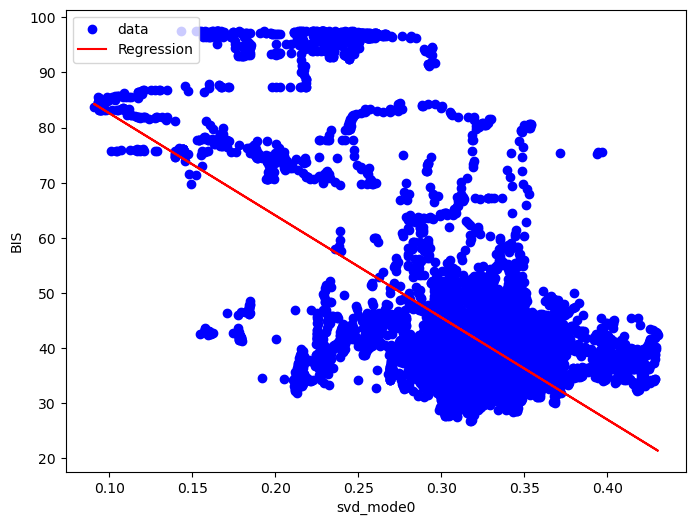

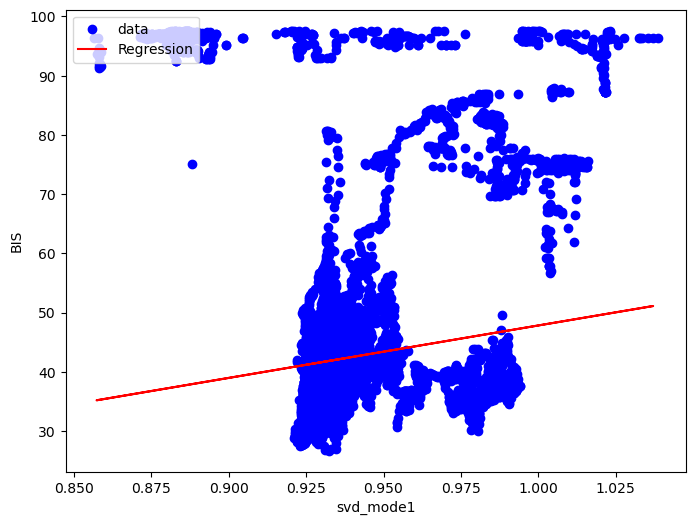

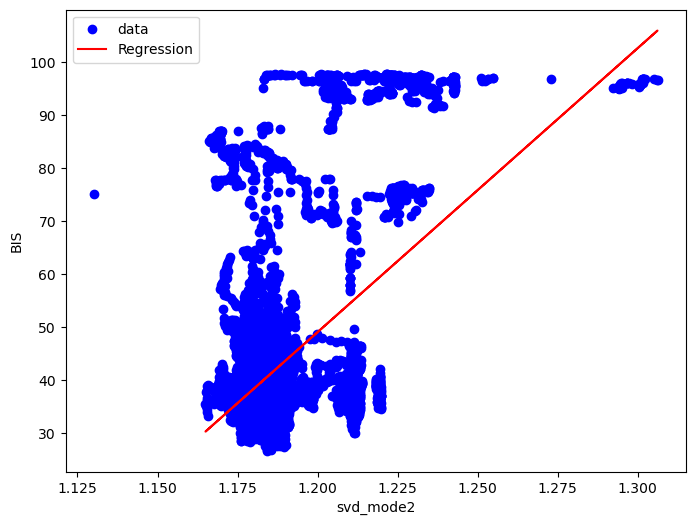

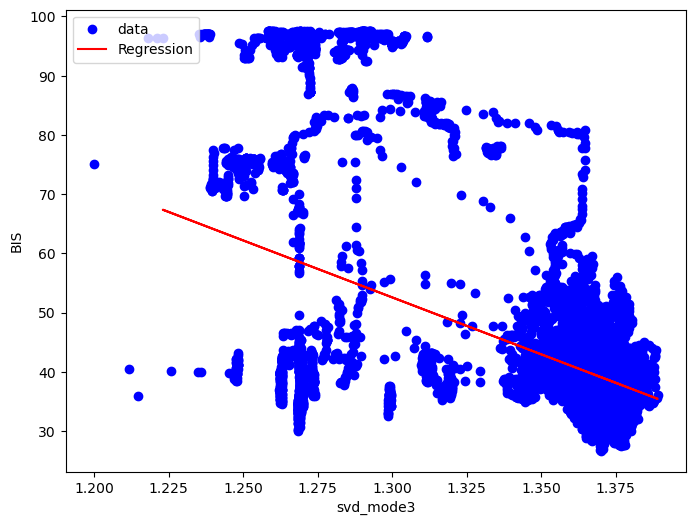

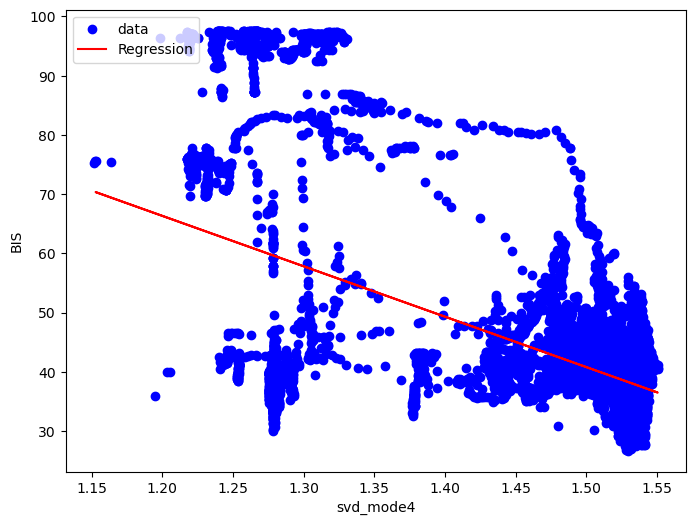

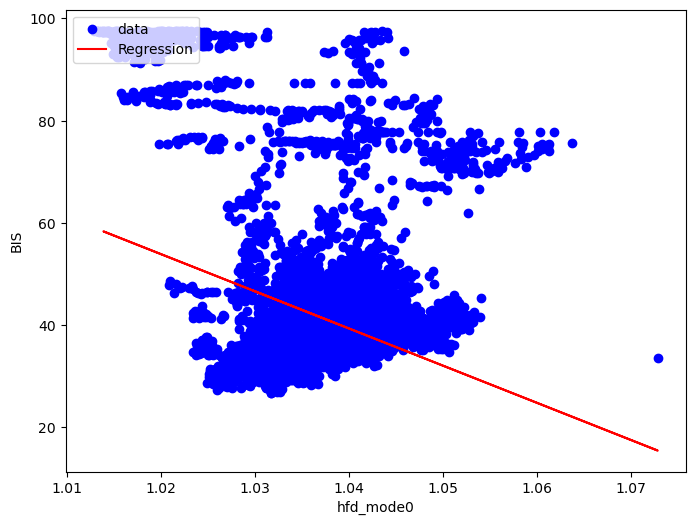

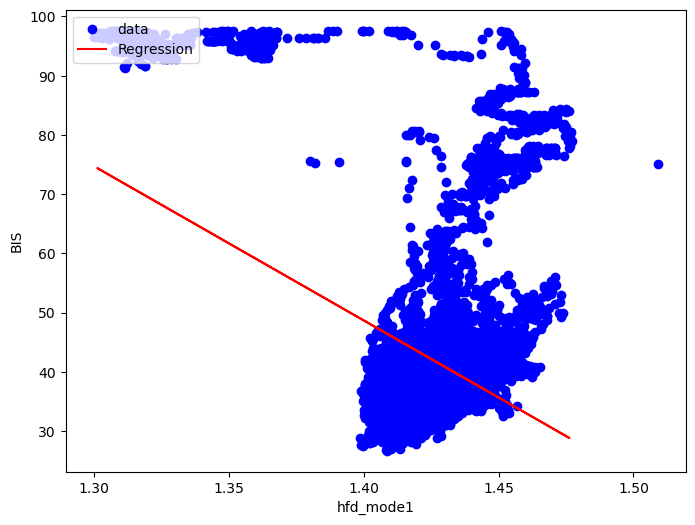

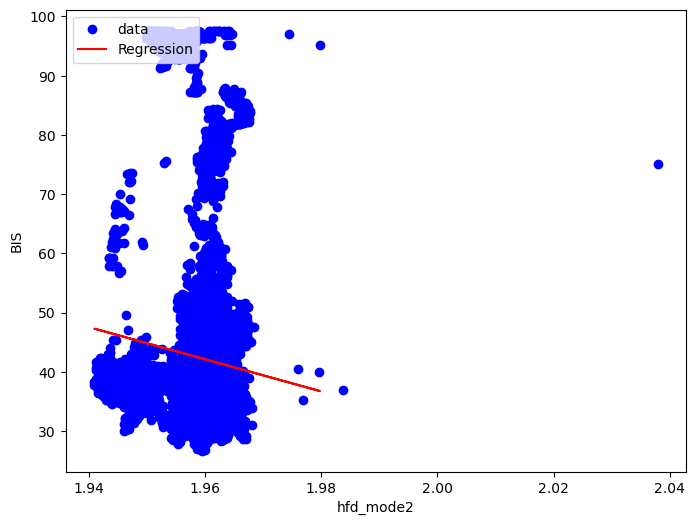

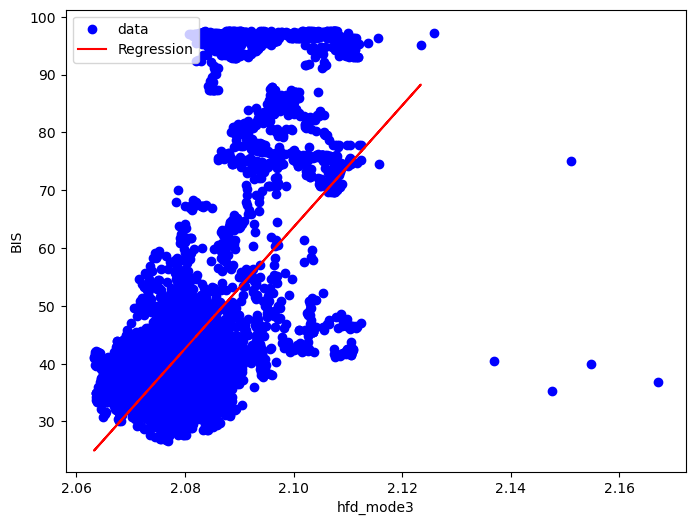

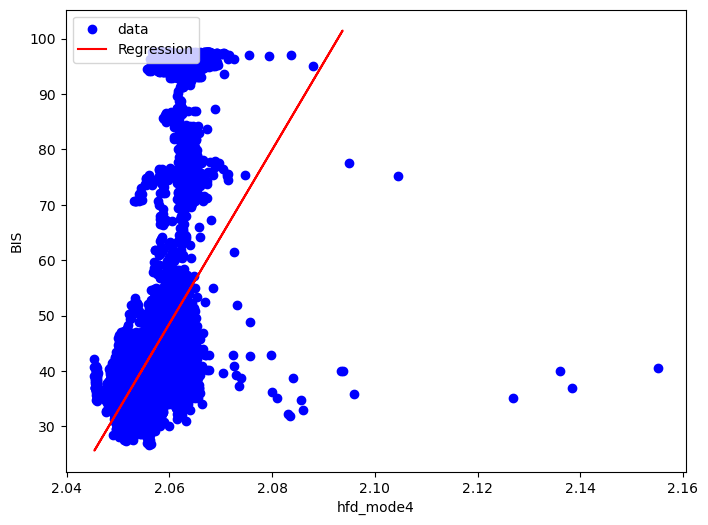

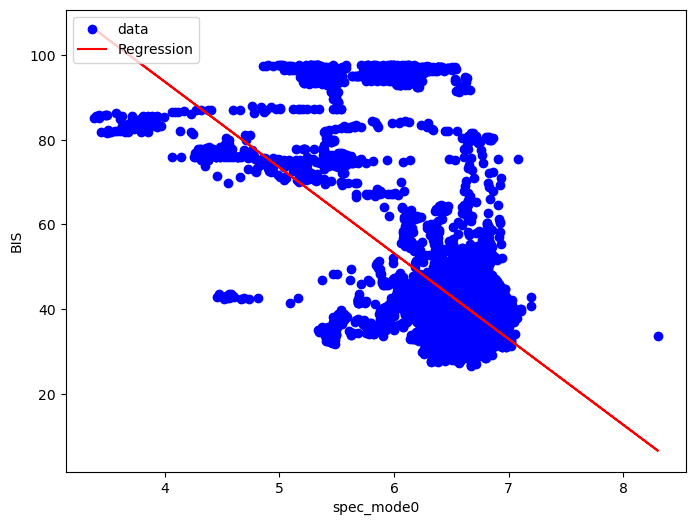

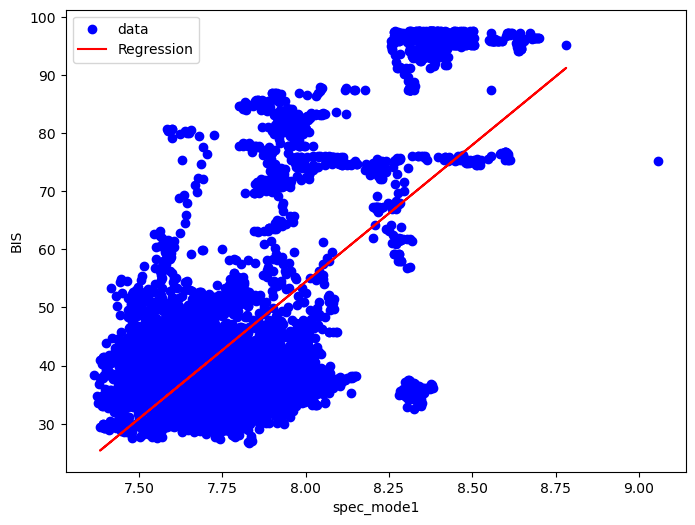

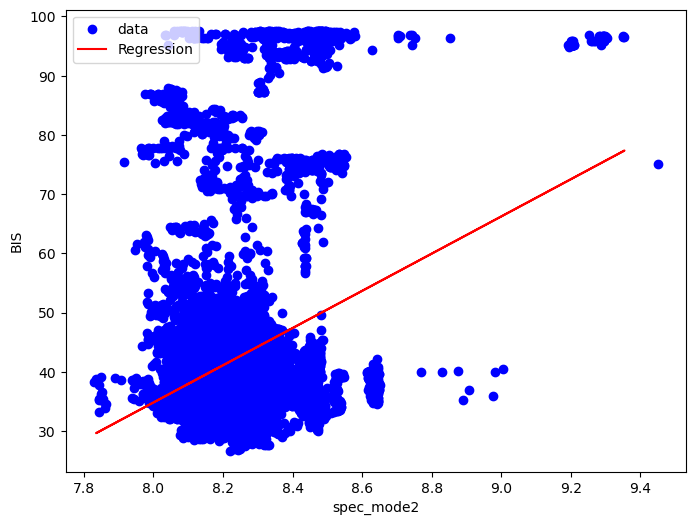

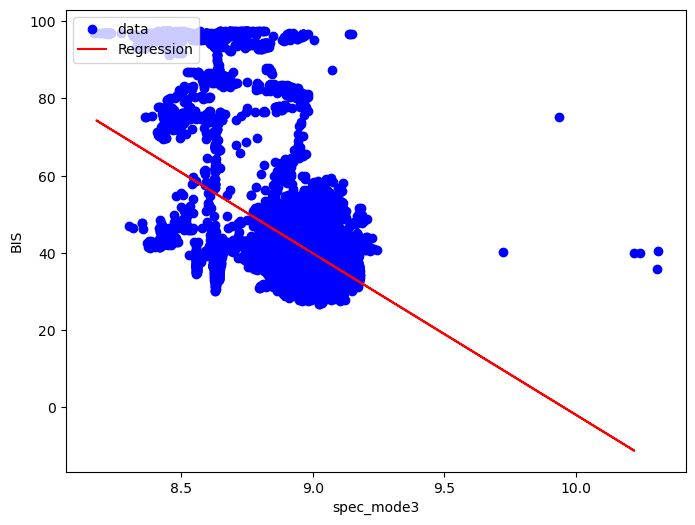

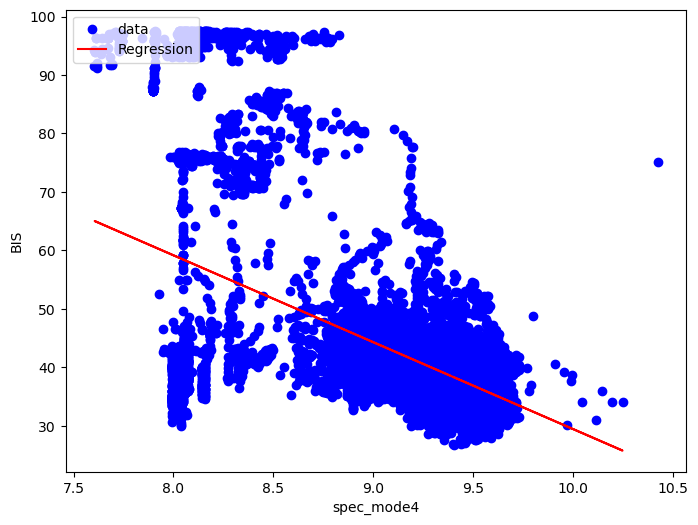

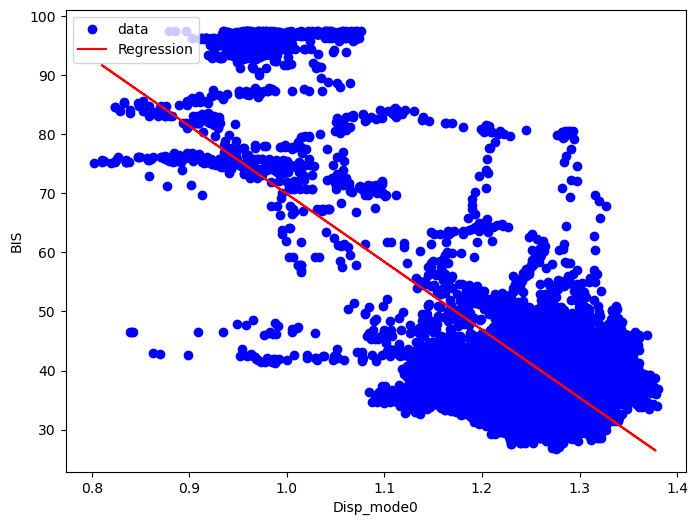

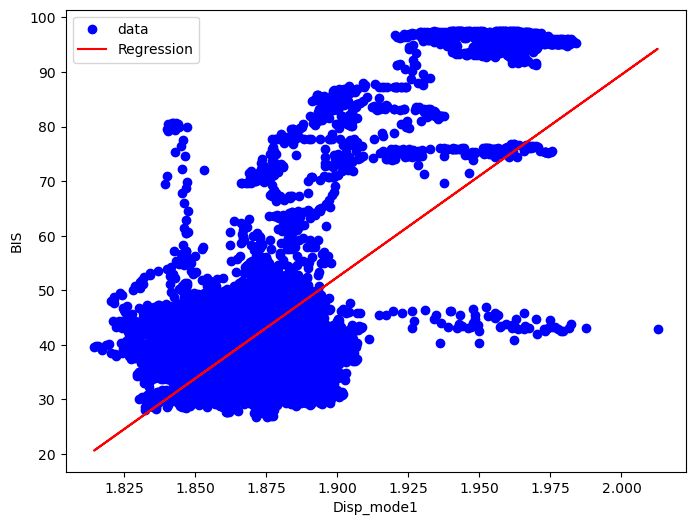

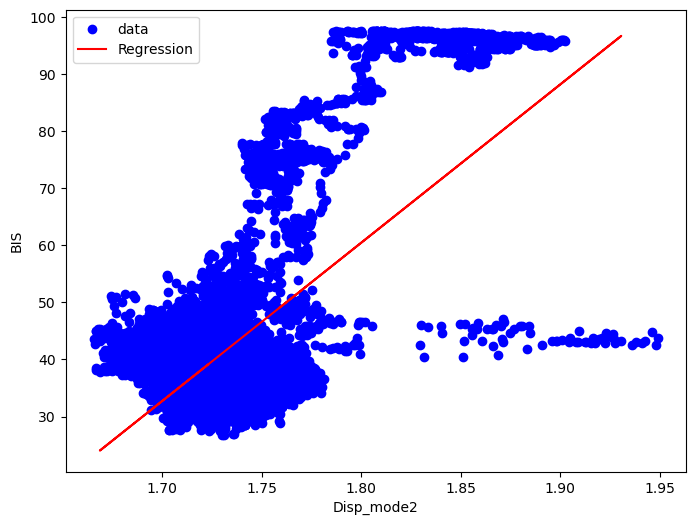

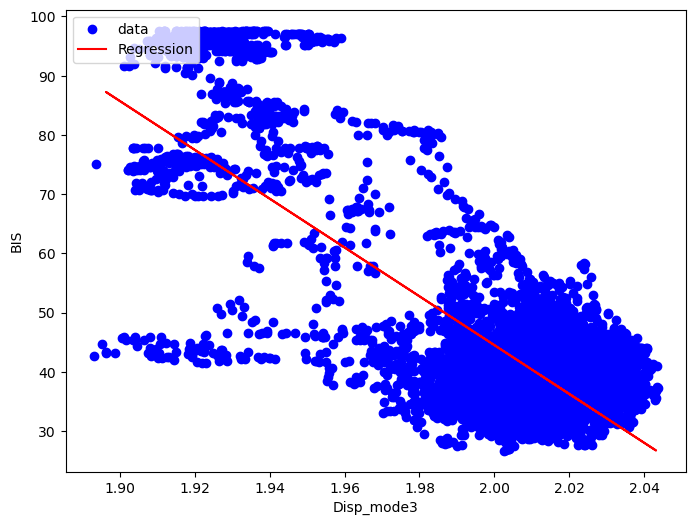

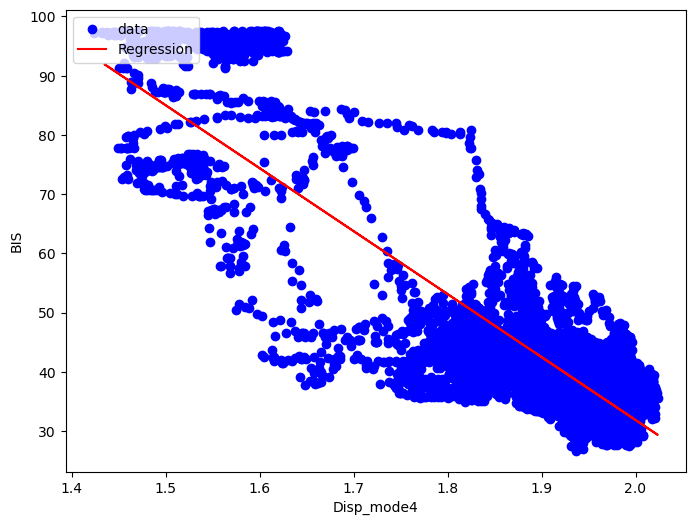

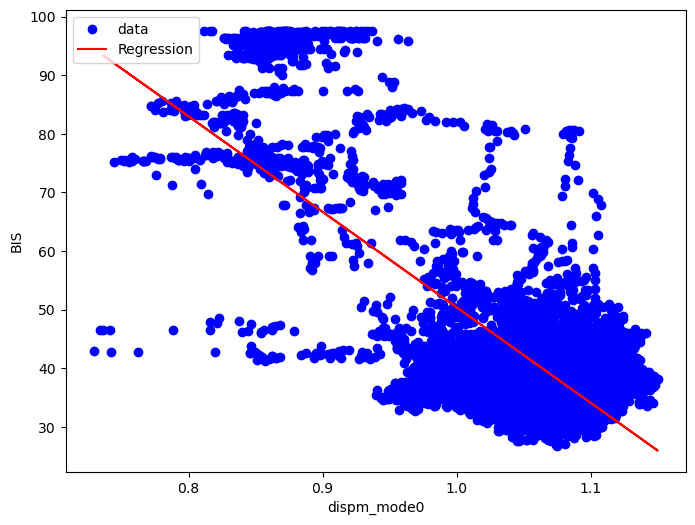

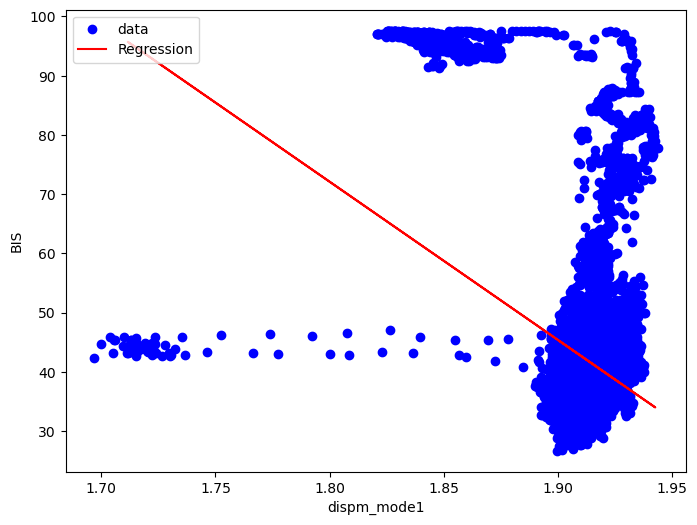

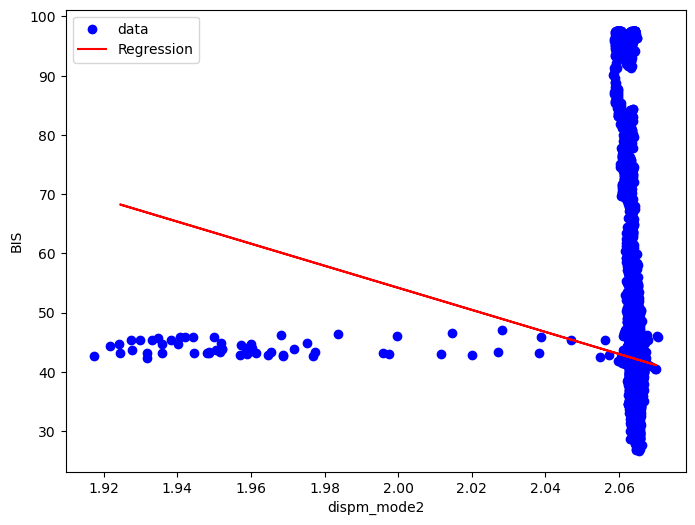

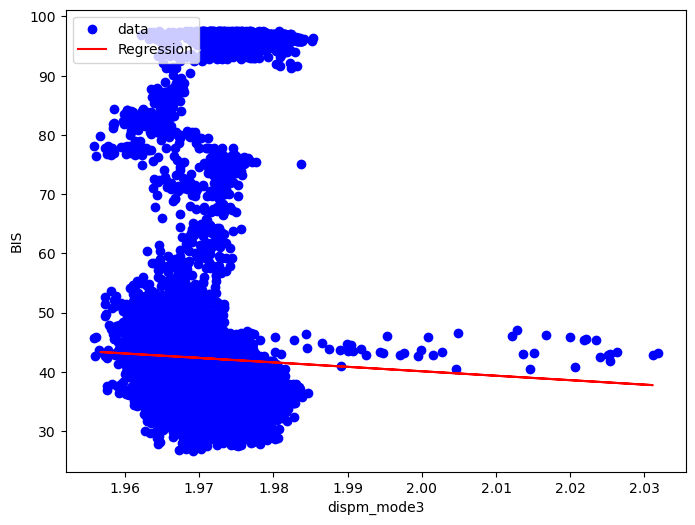

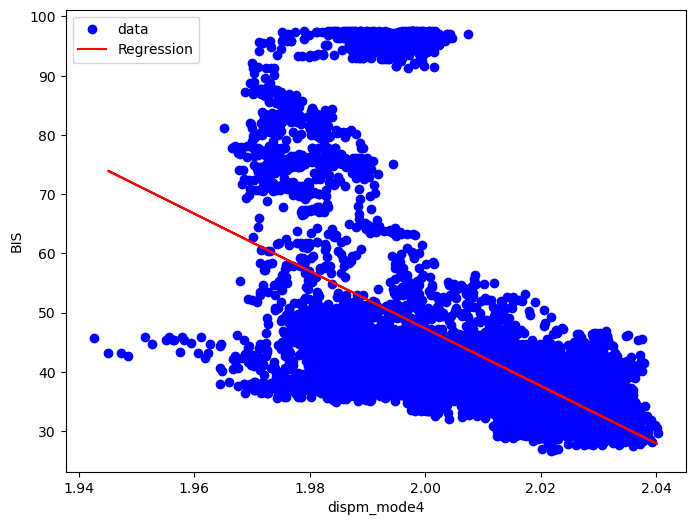

In [8]:

for column in patient_97.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_97, column)
    


In [9]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [10]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
54,Disp_mode4_r2,77.744267
31,lzc_mode1_r2,70.341727
33,lzc_mode3_r2,67.754973
53,Disp_mode3_r2,63.396246
16,detf_mode1_r2,61.210001
50,Disp_mode0_r2,60.604655
55,dispm_mode0_r2,58.440776
6,hc_mode1_r2,54.213269
26,pet_mode1_r2,53.112970
46,spec_mode1_r2,50.165708


### Radom forest feature selection

In [11]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
54     Disp_mode4    0.771671
22  Perment_mode2    0.040458
59    dispm_mode4    0.037531
32      lzc_mode2    0.027142
27      pet_mode2    0.021856
56    dispm_mode1    0.014266
31      lzc_mode1    0.011055
36      svd_mode1    0.007435
21  Perment_mode1    0.004879
40      hfd_mode0    0.004456
26      pet_mode1    0.003677
5        hc_mode0    0.003573
44      hfd_mode4    0.003532
41      hfd_mode1    0.003212
47     spec_mode2    0.002458
24  Perment_mode4    0.002248
52     Disp_mode2    0.002051
29      pet_mode4    0.001915
7        hc_mode2    0.001761
12      kfd_mode2    0.001659
33      lzc_mode3    0.001637
51     Disp_mode1    0.001620
6        hc_mode1    0.001561
4        hm_mode4    0.001451
19     detf_mode4    0.001394
30      lzc_mode0    0.001358
2        hm_mode2    0.001357
1        hm_mode1    0.001339
15     detf_mode0    0.001317
37      svd_mode2    0.001275
3        hm_mode3    0.001235
43      hfd_mode3    0.001055
53     Dis